## Arshia Yousefi Nezhad
### 610302085
### HW1 Pro. Sajedi
### Machine Learning

# Read Data

In [15]:
import pandas as pd
import numpy as np

df = pd.read_csv('parkinsons_updrs.data')
df.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


# Split - Set Target feature - Nomalization
I choose total UPDRS for target columns and convert it to binary number

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Determine X columns
X_train = train_data.drop(['total_UPDRS'], axis=1)
y_train = train_data[['total_UPDRS']]

# Determine target column
X_test = test_data.drop(['total_UPDRS'], axis=1)
y_test = test_data[['total_UPDRS']]

# for preprocess this you need be more familiar with dataset
def median_total_UPDRS(y):
    med_total_UPDRS = y.total_UPDRS.median()
    return y.total_UPDRS.map(lambda x: 1 if x >= med_total_UPDRS else 0)

y_train = median_total_UPDRS(y_train)
y_test = median_total_UPDRS(y_test)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)



# Create and Training Models


 Decision Tree 
Best Parameters: {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Cross-validation results for Decision Tree
Mean Accuracy: 0.9961702127659574
Mean Precision: 0.9949277656062774
Mean Recall: 0.9974468085106384
Mean F1: 0.9961805805726245

 Random Forest 
Best Parameters: {'criterion': 'entropy', 'min_samples_split': 2, 'n_estimators': 30}
Cross-validation results for Random Forest
Mean Accuracy: 0.9904255319148936
Mean Precision: 0.9914806041069502
Mean Recall: 0.9893617021276595
Mean F1: 0.9904060955201024

 XGBoost 
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.8}
Cross-validation results for XGBoost
Mean Accuracy: 0.9968085106382979
Mean Precision: 0.9982996792700005
Mean Recall: 0.9953191489361704
Mean F1: 0.996797788165605

 SVM 
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Cross-validation results for SVM
Mean Accuracy: 0.978085106382978

C:\Users\RP.co\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\RP.co\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\RP.co\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\RP.co\A

Best Parameters: {'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'max_iter': 100}


C:\Users\RP.co\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\RP.co\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\RP.co\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\RP.co\A

Cross-validation results for MLP
Mean Accuracy: 0.9791489361702128
Mean Precision: 0.9812459063515437
Mean Recall: 0.9770212765957448
Mean F1: 0.97909136593786


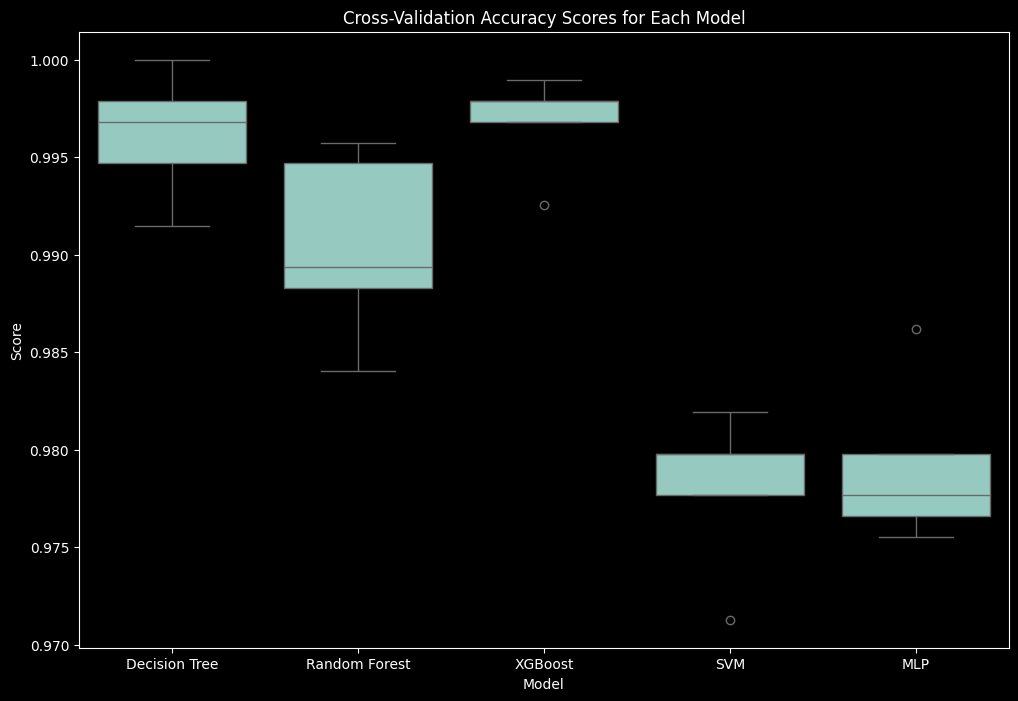

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')

class Model:
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test

        self.models = {
            'Decision Tree': DecisionTreeClassifier(random_state=42),
            'Random Forest': RandomForestClassifier(random_state=42),
            'XGBoost': XGBClassifier(random_state=42),
            'SVM': SVC(random_state=42),
            'MLP': MLPClassifier(random_state=42),
        }

        self.cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        self.scoring = {
            'accuracy': 'accuracy',
            'precision': 'precision',
            'recall': 'recall',
            'f1': 'f1'
        }

        self.cv_results = {model_name: None for model_name in self.models}

    def _grid_search(self, model, param_grid):
        grid_search = GridSearchCV(
            model,
            param_grid=param_grid,
            scoring=self.scoring,
            cv=self.cv,
            refit='accuracy',  # Specify the metric for refitting
        )
        grid_search.fit(self.X_train, self.y_train)
        print("Best Parameters:", grid_search.best_params_)
        return grid_search.best_estimator_

    def _cross_validation(self, model, param_grid, model_name):
        best_model = self._grid_search(model, param_grid)
        results = cross_validate(best_model, self.X_train, self.y_train, cv=self.cv, scoring=self.scoring)

        print(f'Cross-validation results for {model_name}')
        for metric in self.scoring:
            print(f'Mean {metric.capitalize()}: {np.mean(results[f"test_{metric}"])}')

        return best_model, results

    def plot_confusion_matrix(self, model):
        y_pred = model.predict(self.X_test)
        cm = confusion_matrix(self.y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
        disp.plot()
        plt.title(f'Confusion Matrix for {model.__class__.__name__}')
        plt.show()

    def train_models(self):
        param_grids = {
            'Decision Tree': {
                'criterion': ['gini', 'entropy'],
                'splitter': ['best', 'random'],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
            },
            'Random Forest': {
                'n_estimators': [10, 30, 100],
                'criterion': ['gini', 'entropy'],
                'min_samples_split': [2, 5]
            },
            'XGBoost': {
                'learning_rate': [0.01, 0.1],
                'n_estimators': [50, 100],
                'max_depth': [3, 4],
                'subsample': [0.8, 1.0],
                'colsample_bytree': [0.8, 1.0],
            },
            'SVM': {
                'C': [0.1, 1, 10],
                'kernel': ['linear', 'rbf'],
                'gamma': ['scale', 'auto', 0.1]
        },
            'MLP': {
                'hidden_layer_sizes': [(50,)],
                'alpha': [0.0001],
                'learning_rate': ['constant'],
                'max_iter': [100],
            }
        }

        for model_name, model in self.models.items():
            print(f'\n {model_name} ')
            self.models[model_name], self.cv_results[model_name] = self._cross_validation(model, param_grids[model_name], model_name)

    def plot_cv_results(self, metric='accuracy'):
        plt.figure(figsize=(12, 8))
        sns.boxplot(x='Model', y=f'test_{metric}', data=self._get_cv_results_df())
        plt.title(f'Cross-Validation {metric.capitalize()} Scores for Each Model')
        plt.ylabel('Score')
        plt.xlabel('Model')
        plt.show()

    def _get_cv_results_df(self):
        dfs = []
        for model_name, cv_result in self.cv_results.items():
            df = pd.DataFrame(cv_result)
            df['Model'] = model_name
            dfs.append(df)

        return pd.concat(dfs, ignore_index=True)

# Example usage:
# Assuming you have X_train, X_test, y_train, y_test

model = Model(scaled_X_train, scaled_X_test, y_train, y_test)
model.train_models()



# Plot cross-validation results
model.plot_cv_results()


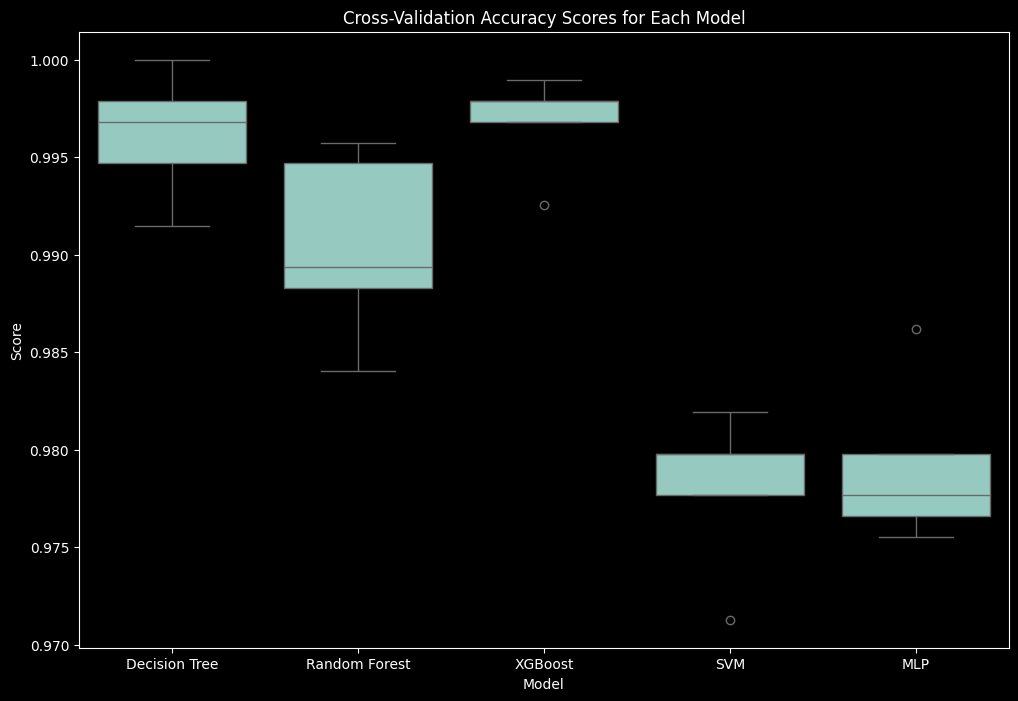

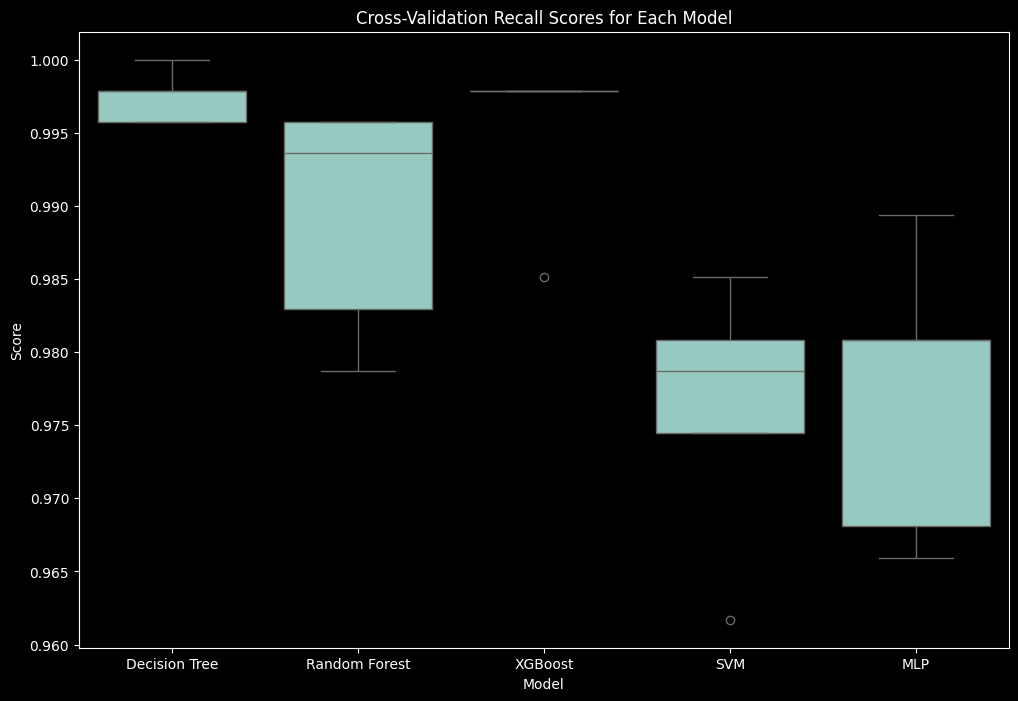

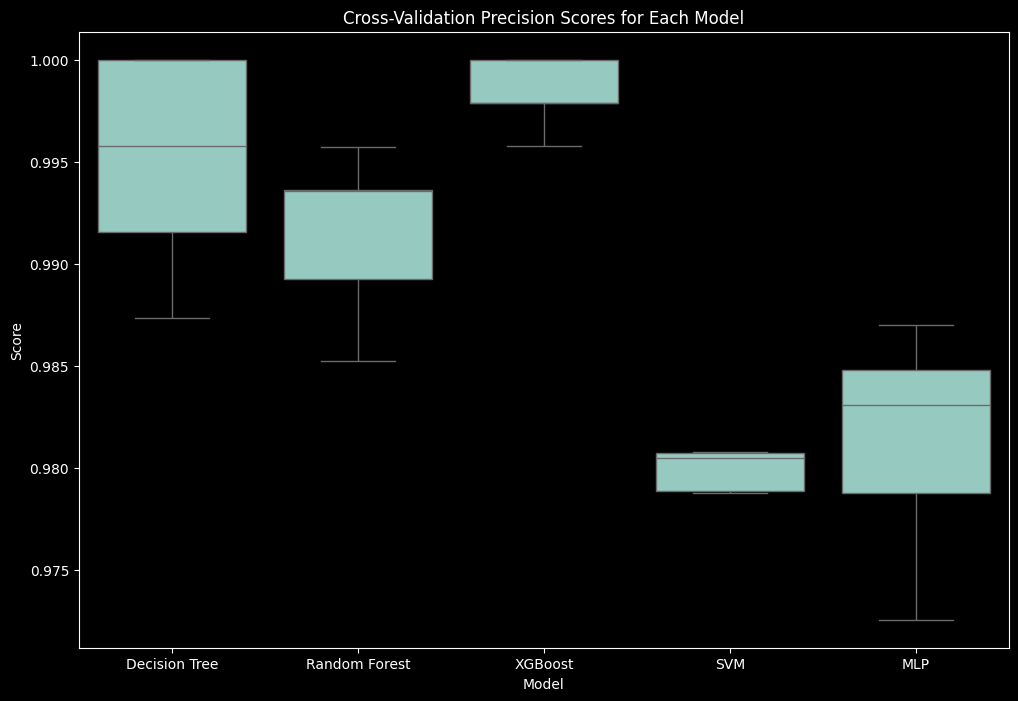

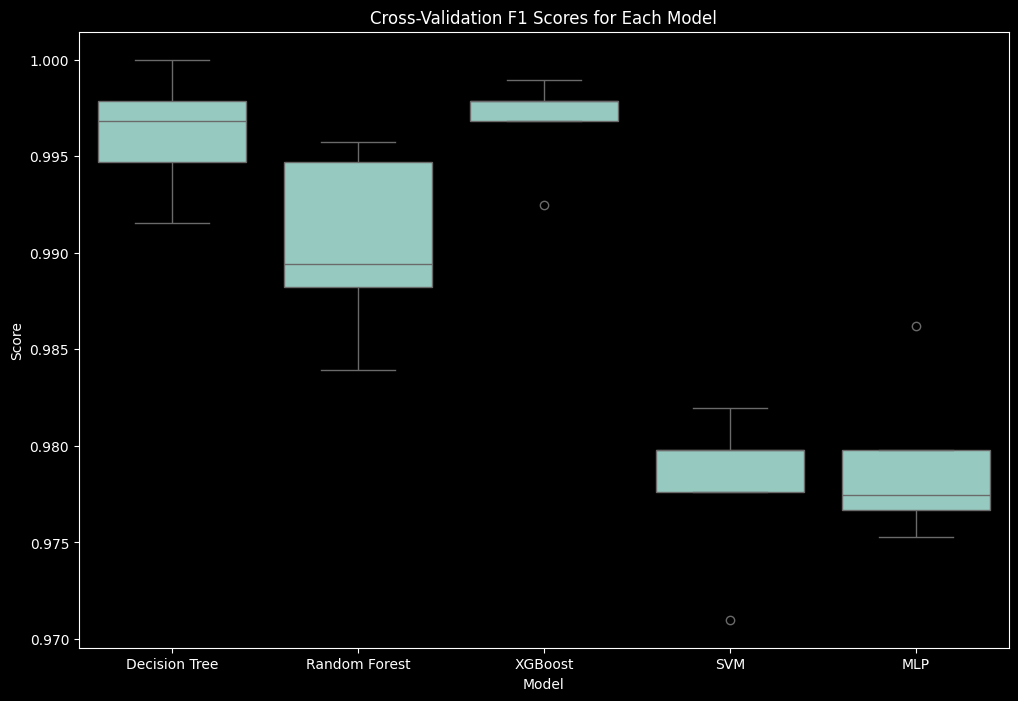

In [24]:
model.plot_cv_results()
model.plot_cv_results(metric='recall')
model.plot_cv_results(metric='precision')
model.plot_cv_results(metric='f1')

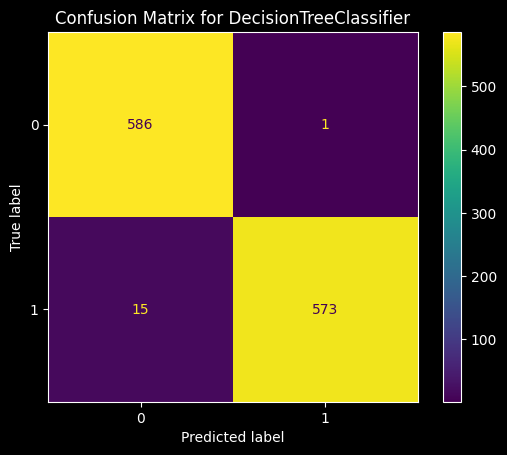

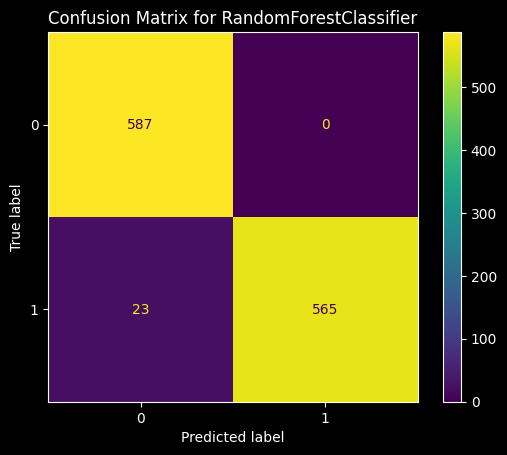

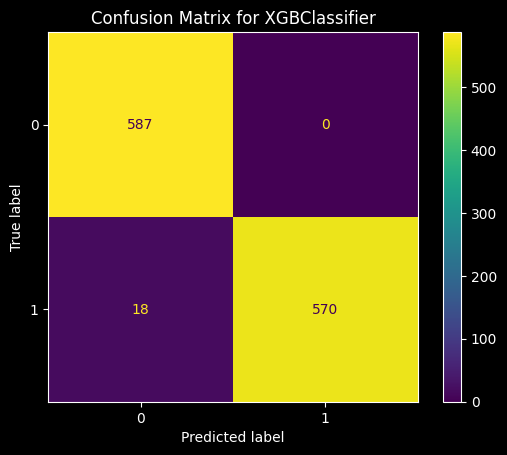

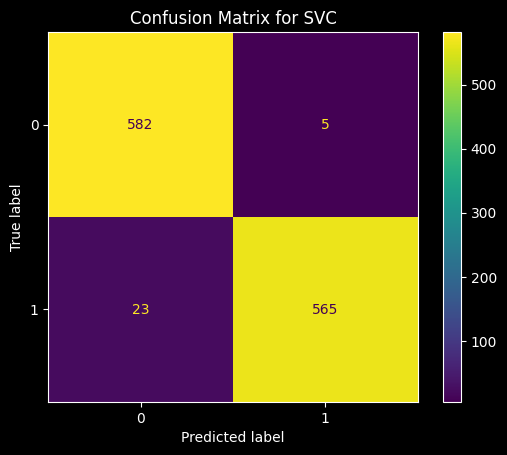

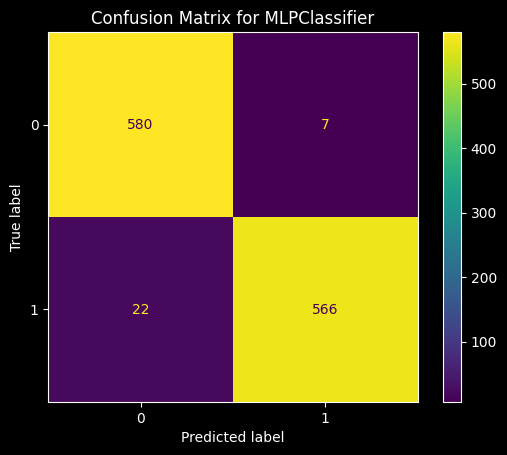

In [19]:
# Access the best models
best_decision_tree_model = model.models['Decision Tree']
best_random_forest_model = model.models['Random Forest']
best_XGBoost = model.models['XGBoost']
best_svm = model.models['SVM']
best_mlp = model.models['MLP']

model.plot_confusion_matrix(best_decision_tree_model)
model.plot_confusion_matrix(best_random_forest_model)
model.plot_confusion_matrix(best_XGBoost)
model.plot_confusion_matrix(best_svm)
model.plot_confusion_matrix(best_mlp)

